# Assignment 3

COMP 6934 \
Nima Barani \
MUN #: 202192777 \
Feb 2023

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import libraries

In [45]:
df = pd.read_csv('olympic_athletes.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Question 1

In [46]:
filtered_df = df.copy()
filtered_df.drop_duplicates(subset=['ID'], keep='first', inplace=True)
filtered_df.dropna(subset=['Height'], inplace=True)

In [47]:
def fetch_data(data, sport, year):
    return data[(data['Sport'] == sport) & (data['Year']>=year)]['Height']

gymnastics_df = fetch_data(filtered_df, 'Gymnastics', 2000)
cycling_df = fetch_data(filtered_df, 'Cycling', 2000)
basketball_df = fetch_data(filtered_df, 'Basketball', 2000)

sports_list = [gymnastics_df, cycling_df, basketball_df]

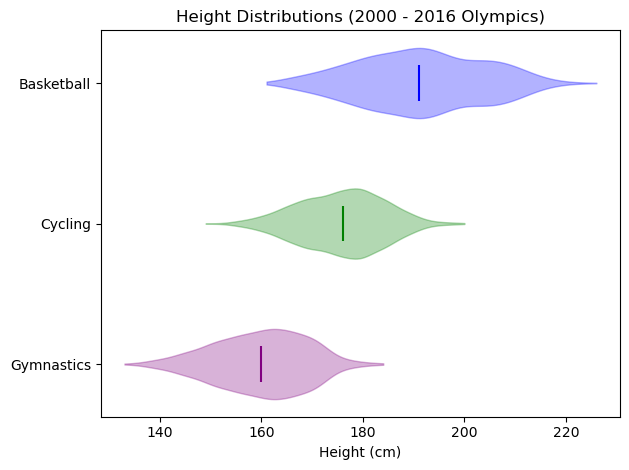

In [48]:
colors = ['purple', 'green', 'blue']
y_locations = [1, 2, 3]
y_labels = ['Gymnastics', 'Cycling', 'Basketball']

fig, ax = plt.subplots()

plot = ax.violinplot(sports_list, vert=False, showmedians=True, showextrema=False)

for i, pc in enumerate(plot['bodies']):
    pc.set_color(colors[i])
    pc.set_linewidth(1)
plot['cmedians'].set_colors(colors)

ax.set_yticks(y_locations, y_labels)
ax.set_xlabel('Height (cm)')
ax.set_title('Height Distributions (2000 - 2016 Olympics)')
plt.tight_layout()
plt.show()

## Question 2

In [49]:
filtered_df = df.copy()
filtered_df.drop_duplicates(subset=['ID', 'Year'], keep='first', inplace=True)

In [50]:
grouped_df = filtered_df[filtered_df['Season']=='Summer'].groupby(['Year', 'Sex'])
heights_df = grouped_df['Height'].agg(['mean', 'std']).unstack()

mean_df = heights_df['mean']
error_df = heights_df['std']

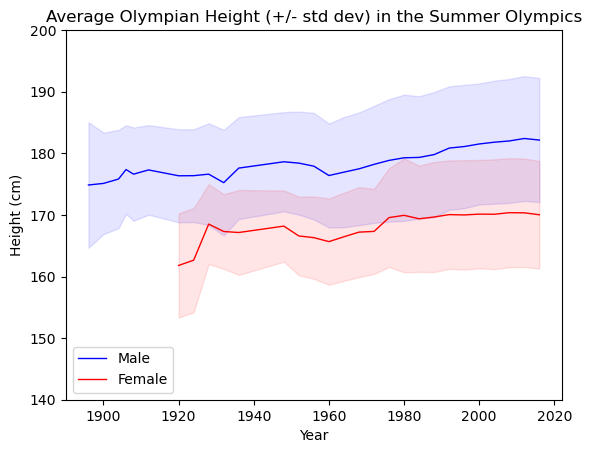

In [51]:
fig, ax = plt.subplots()

ax.plot(mean_df['M'], linewidth=1, color='blue')
ax.plot(mean_df['F'], linewidth=1, color='red')

ax.fill_between(mean_df['M'].index, mean_df['M']+error_df['M'], mean_df['M']-error_df['M'], alpha=0.1, color='blue')
ax.fill_between(mean_df['F'].index, mean_df['F']+error_df['F'], mean_df['F']-error_df['F'], alpha=0.1, color='red')

ax.legend(['Male', 'Female'], loc='lower left')
ax.set_ylim(140, 200)
ax.set_title('Average Olympian Height (+/- std dev) in the Summer Olympics')
ax.set_ylabel('Height (cm)')
ax.set_xlabel('Year')

plt.show()

## Question 3

In [52]:
medal_df = df.groupby(['Name', 'Medal'])['Medal'].count().unstack().fillna(0)
medal_df['Total'] = medal_df.agg('sum', axis=1)
medal_df = medal_df.sort_values(by=['Total', 'Gold', 'Silver', 'Bronze'],
                     ascending=False).head(10)

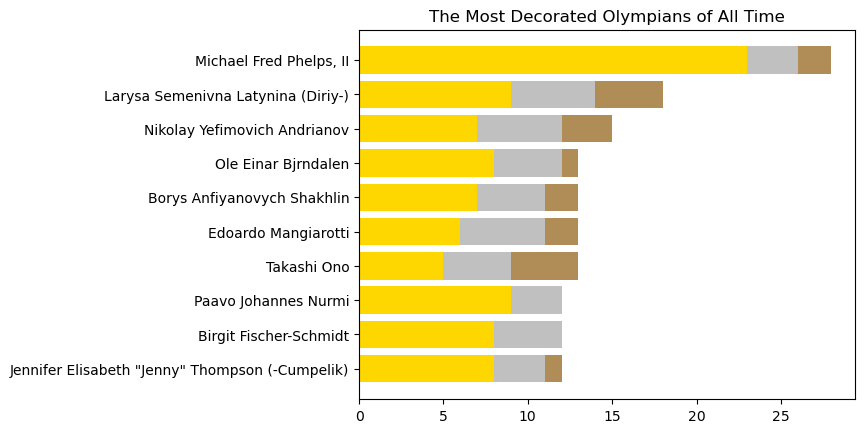

In [53]:
fig, ax = plt.subplots()
ax.barh(medal_df.index, medal_df['Gold'], color='#FFD700')

ax.barh(medal_df.index, medal_df['Silver'], 
        left=medal_df['Gold'], color='#C0C0C0')

ax.barh(medal_df.index, medal_df['Bronze'], 
        left=medal_df['Gold']+medal_df['Silver'], color='#B08D57')

ax.invert_yaxis()
ax.set_title('The Most Decorated Olympians of All Time')
plt.show()

## Attribution
1. Pandas 1.5.3 documentation: https://pandas.pydata.org/docs/reference/index.html
2. Matplotlib 3.6.3 documentation: https://matplotlib.org/3.6.3/api/index.html